# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


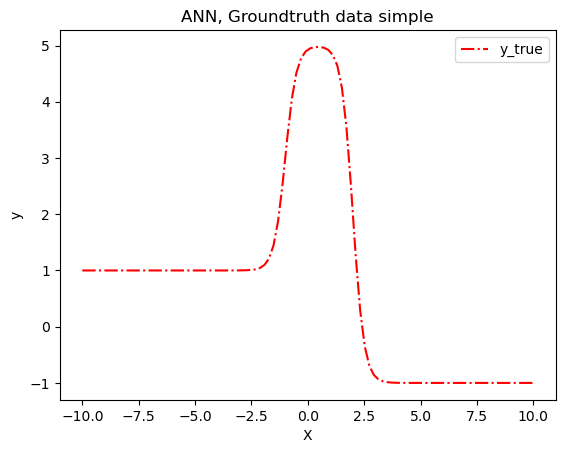

In [79]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    # y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

In [80]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True,
                   random_state=42)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

OK


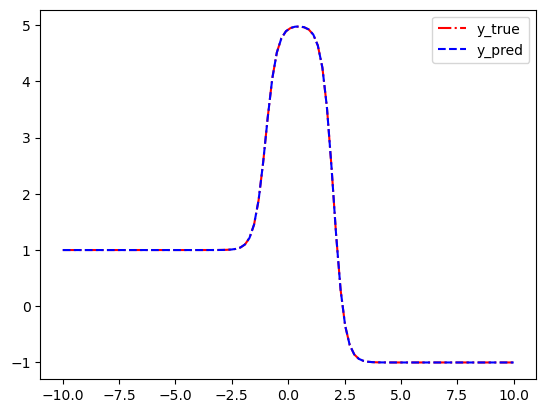

In [81]:
plt.plot(X, y_true, "r-.")
plt.plot(X, y_pred, "b--")
plt.legend(["y_true", "y_pred"])
plt.show()

#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

In [ ]:
print("Weights:\t", mlp.coefs_)
print("intercepts:\t", mlp.intercepts_)

Weights:	 [array([[-1.99436579,  1.9977693 ]]), array([[-2.00098601],
       [-3.00100128]])]
intercepts:	 [array([-1.99343856, -3.9950746 ]), array([-0.00016906])]


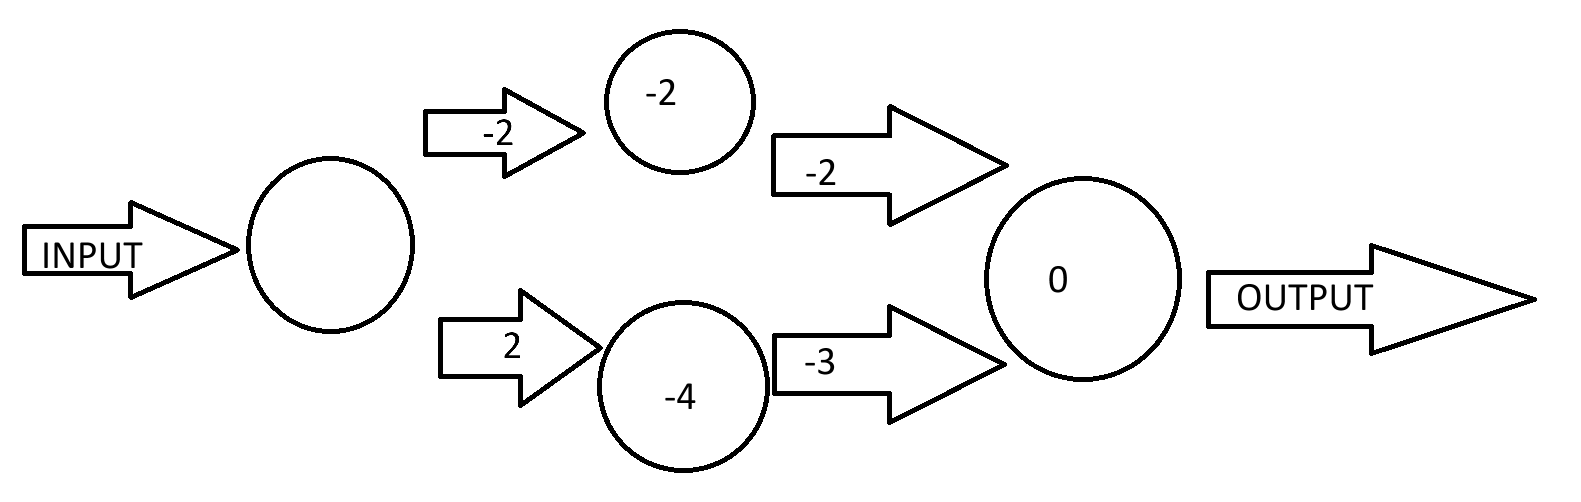

#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [ ]:
y_math = -2.001 * np.tanh(-1.994 * X -1.993) - 3.001 * np.tanh(1.998 * X -3.995) + 0

#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

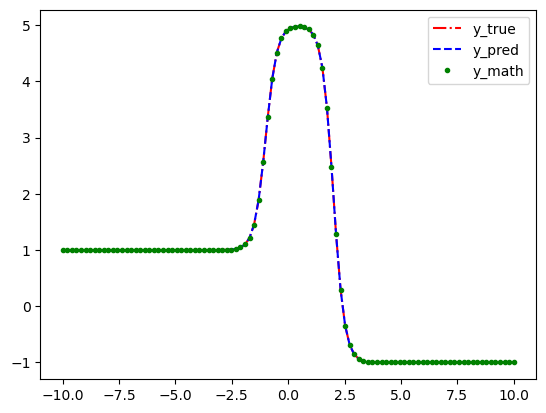

In [84]:
plt.plot(X, y_true, "r-.")
plt.plot(X, y_pred, "b--")
plt.plot(X, y_math, "g.")
plt.legend(["y_true", "y_pred", "y_math"])
plt.show()

#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

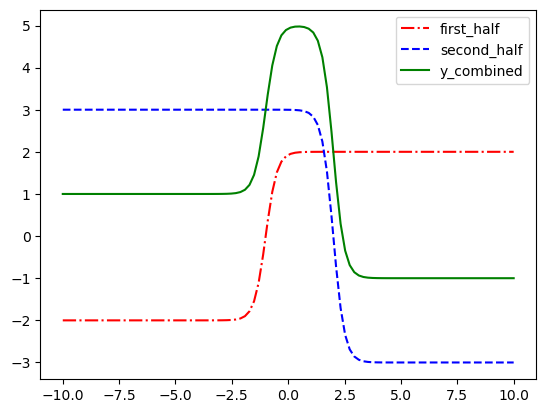

In [85]:
first_half = -2.001 * np.tanh(-1.994 * X -1.993)
second_half = - 3.001 * np.tanh(1.998 * X -3.995)
y_combined = first_half + second_half + 0

plt.plot(X, first_half, "r-.")
plt.plot(X, second_half, "b--")
plt.plot(X, y_combined, "g-")
plt.legend(["first_half", "second_half", "y_combined"])
plt.show()

#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

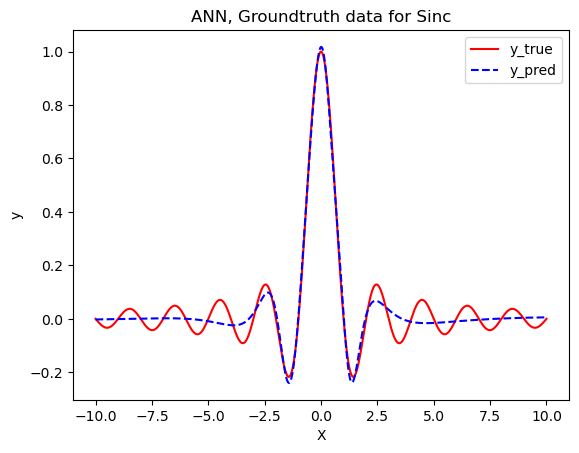

In [86]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-10, 10, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")

mlp = MLPRegressor(activation='tanh', 
                   hidden_layer_sizes=[20], 
                   alpha=1e-5, 
                   solver='lbfgs', 
                   max_iter=10000, 
                   verbose=True, 
                   random_state=42)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)
plt.plot(X, y_pred, "b--")
plt.legend(["y_true", "y_pred"])
plt.show()

####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

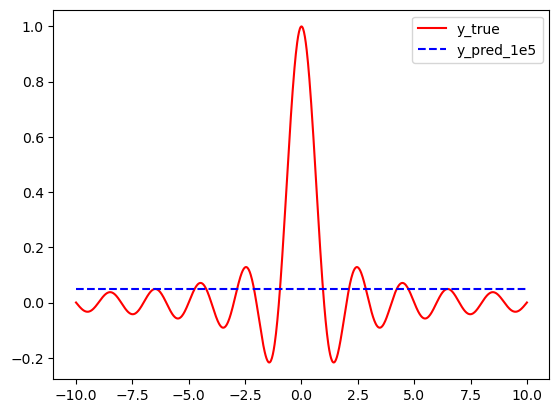

In [87]:
mlp_1e5 = MLPRegressor(activation='tanh',
                        hidden_layer_sizes=[20], 
                        alpha=1e5, 
                        solver='lbfgs', 
                        max_iter=10000, 
                        verbose=True, 
                        random_state=42) 

mlp_1e5.fit(X, y_true)
y_pred_1e5 = mlp_1e5.predict(X)
plt.plot(X, y_true, "r-")
plt.plot(X, y_pred_1e5, "b--")
plt.legend(["y_true", "y_pred_1e5"])
plt.show()

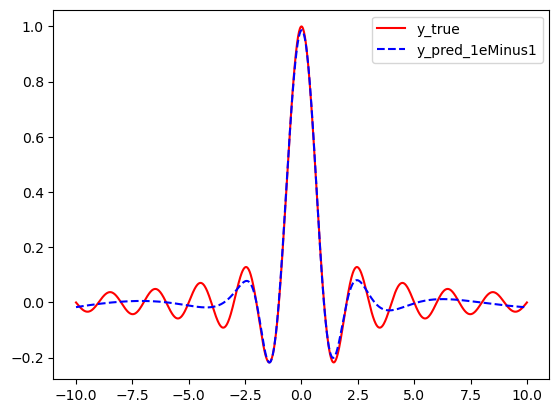

In [88]:
mlp_1eMinus1 = MLPRegressor(activation='tanh',
                        hidden_layer_sizes=[20], 
                        alpha=1e-1, 
                        solver='lbfgs', 
                        max_iter=10000, 
                        verbose=True, 
                        random_state=42) 

mlp_1eMinus1.fit(X, y_true)
y_pred_1eMinus1 = mlp_1eMinus1.predict(X)
plt.plot(X, y_true, "r-")
plt.plot(X, y_pred_1eMinus1, "b--")
plt.legend(["y_true", "y_pred_1eMinus1"])
plt.show()

### Keras implementation

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1000)              2000      
                                                                 
 dense_22 (Dense)            (None, 20)                20020     
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 22,041
Trainable params: 22,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.1272 - mae: 0.2654
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0398 - mae: 0.1165
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0367 - mae: 0.1117
Epoch 4/100
32/32 [=============

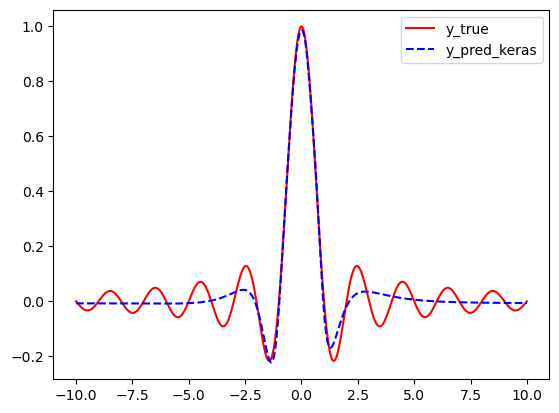

In [ ]:
keras_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(1)
])

keras_model.summary()

keras_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
keras_model.fit(X, y_true, epochs=100, verbose=1)
y_pred_keras = keras_model.predict(X)
plt.plot(X, y_true, "r-")
plt.plot(X, y_pred_keras, "b--")
plt.legend(["y_true", "y_pred_keras"])
plt.show()

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.